# Credit Default Prediction using Stacked Ensemble Technique

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data = pd.read_excel("C:/Users/abhin/Desktop/NCI 2022/DMML1/datasetsand project semester/Final Submission DMML/Credit card UC Datasets/default_of_credit_card_clients.xls"\
                    ,header=1)
data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [39]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [40]:
data['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [41]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [43]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [44]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Since our dependent variable is categorical, we can split the distributions by "default/not-default". Default class (28.4 %) which is appropriate for this analysis and Oversampling may not be required.

In [45]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

temp = data["default payment next month"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Default Class - data unbalance (Not Default = 0, Default = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data = [trace]
layout = dict(title = 'Credit DefaultClass - data unbalance (Not Default = 0, Default = 1)',
          xaxis = dict(title = 'Default', showticklabels=True), 
          yaxis = dict(title = 'Number of clients'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

In [11]:
data.shape

(30000, 25)

In [12]:
data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

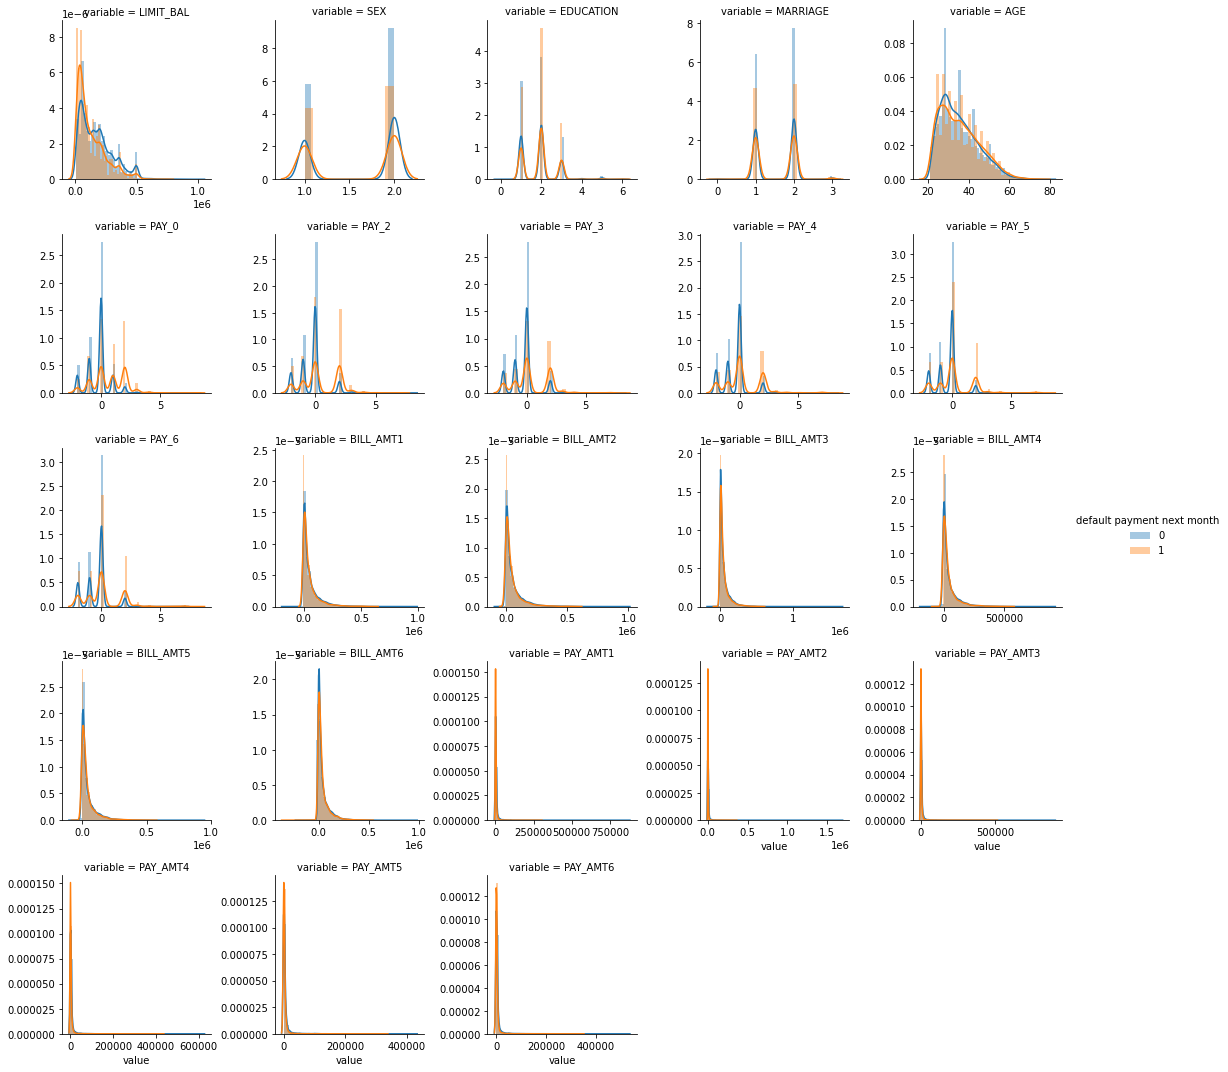

In [13]:
output = 'default payment next month'

# Let's do a little EDA
cols = [ f for f in data.columns if data.dtypes[ f ] != "object"]


cols.remove('ID')
cols.remove( output )

f = pd.melt( data, id_vars=output, value_vars=cols)
g = sns.FacetGrid( f, hue=output, col="variable", col_wrap=5, sharex=False, sharey=False )
g = g.map( sns.distplot, "value", kde=True).add_legend()

**Observations:**
*     Defaults have a higher proportion of Lower LIMIT_BAL values
*     NonDefaults have a higher proportion of Females (Sex=2)
*     NonDefaults have a higher proportion of MoreEducated (EDUCATION=1 or 2)
*     NonDefaults have a higher proportion of Singles (MARRIAGE=2)
*     NonDefaults have a higher proportion of people 30-40years
*     NonDefaults have a MUCH higher proportion of zero or negative PAY_X variables 
        (this means that being current or ahead of payments is associated with not defaulting in the following month).
        **This is a strong relationship as the distribution are more separated - so we expect the PAY_X to be important!**


In [14]:
print("We have %d with EDUCATION=0" % len(data.loc[ data["EDUCATION"]==0]))
print("We have %d with EDUCATION=4" % len(data.loc[ data["EDUCATION"]==4]))
print("We have %d with EDUCATION=5" % len(data.loc[ data["EDUCATION"]==5]))
print("We have %d with EDUCATION=6" % len(data.loc[ data["EDUCATION"]==6]))

We have 14 with EDUCATION=0
We have 123 with EDUCATION=4
We have 280 with EDUCATION=5
We have 51 with EDUCATION=6


In [15]:
features = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',\
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',\
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',\
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
target = ['default payment next month']

In [16]:
X = data[features].values    
y = data[ target ].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )

# We'll need some metrics to evaluate our models
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [17]:
#-------------- 
# Random Forest 
#--------------
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
# print("Accuracy on Test Set  = %.4f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("Accuracy score for RandomForest= %.4f" %(accuracy_score(y_test, y_pred)))
scores = cross_val_score( clf, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy %.4f, with std=%.4f" % (scores.mean(), scores.std() ))

Accuracy score for RandomForest= 0.8067
Mean RandomForest CrossVal Accuracy 0.8047, with std=0.0048


In [18]:
#-------------- 
# kernel SVM 
#--------------
from sklearn.svm import SVC
clf = SVC(kernel="rbf")
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
# print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("Accuracy score for k-SVM= %.4f" %(accuracy_score(y_test, y_pred)))
scores = cross_val_score( clf, X_train, y_train, cv=10)
print("Mean kernel-SVM CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scores.mean(), scores.std() ))

Accuracy score for k-SVM= 0.8208
Mean kernel-SVM CrossVal Accuracy on Train Set 0.82, with std=0.01


In [19]:
#-------------- 
# Logistic Regression 
#--------------
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy score for LogReg= %.4f" %(accuracy_score(y_test, y_pred)))
scores = cross_val_score( clf, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scores.mean(), scores.std() ))

Accuracy score for LogReg= 0.8115
Mean LogReg CrossVal Accuracy on Train Set 0.81, with std=0.01


In [20]:
#-------------- 
# Naive Bayes 
#--------------
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy score for NB= %.4f" %(accuracy_score(y_test, y_pred)))
scores = cross_val_score( clf, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scores.mean(), scores.std() ))

Accuracy score for NB= 0.6788
Mean NaiveBayes CrossVal Accuracy on Train Set 0.68, with std=0.04


In [21]:
#-------------- 
# K-NEIGHBOURS 
#--------------
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy score for Knn= %.4f" %(accuracy_score(y_test, y_pred)))
scores = cross_val_score( clf, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scores.mean(), scores.std() ))

Accuracy score for Knn= 0.7948
Mean KN CrossVal Accuracy on Train Set Set 0.79, with std=0.01


In [22]:
#-------------- 
# Decision Tree
#--------------
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
# print("Accuracy on Test Set  = %.4f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
print("Accuracy score for DT= %.4f" %(accuracy_score(y_test, y_pred)))
scores = cross_val_score( clf, X_train, y_train, cv=10)
print("Mean DT CrossVal Accuracy %.4f, with std=%.4f" % (scores.mean(), scores.std() ))

Accuracy score for DT= 0.7325
Mean DT CrossVal Accuracy 0.7231, with std=0.0068


In [23]:
#-------------- 
# XGB
#--------------
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit( X_train, y_train )
y_pred = clf.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy score for Knn= %.4f" %(accuracy_score(y_test, y_pred)))
scores = cross_val_score( clf, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scores.mean(), scores.std() ))

Accuracy score for Knn= 0.8170
Mean KN CrossVal Accuracy on Train Set Set 0.82, with std=0.00


## Stacking Ensemble Technique (DT, LR, SVM, NB)

In [24]:
from numpy import mean
from numpy import std
from sklearn.ensemble import StackingClassifier

# get a stacking ensemble of models lv1 :LogReg
def get_stackingLR(my_models_lv0):
    # define the base models

    level0 = list(my_models_lv0.items())

    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
    return model
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=21)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

### Iteration 1 for Stacked Model: lv0: (DT, SVC, NB) and lv1: LogReg

In [64]:
# input_models = {'DT':DT(), 'LogReg':LogReg(), 'SVC':SVC(), 'NB':NB()}
input_models = {'DT':DecisionTreeClassifier(), 'SVC':SVC(), 'NB':GaussianNB()} 
stacked_LR1 = get_stackingLR(input_models)
stacked_LR1

StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()), ('SVC', SVC()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

In [68]:
%%time
# Model Evaluation for Iter1

scores = evaluate_model(stacked_LR1, X, y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_LR1, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()), ('SVC', SVC()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression()) Accuracy:  0.7789 (0.000)
Wall time: 4min 53s


### Iteration 2 for Stacked Model: lv0: (DT, LogReg) and lv1: LogReg

In [46]:
# Model selection and evaluation
input_models = {'DT':DecisionTreeClassifier(), 'LogReg':LogisticRegression()}
stacked_LR2 = get_stackingLR(input_models)
stacked_LR2

StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [47]:
%%time
scores = evaluate_model(stacked_LR2,  X,y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_LR2, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=LogisticRegression()) Accuracy:  0.7808 (0.001)
Wall time: 6.23 s


### Iteration 3 for Stacked Model: lv0: (DT, LogReg,NB) and lv1: LogReg

In [73]:
# Model selection and evaluation
input_models = {'DT':DecisionTreeClassifier(), 'LogReg':LogisticRegression(), 'NB':GaussianNB()}
stacked_LR3 = get_stackingLR(input_models)
stacked_LR3

StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

In [74]:
%%time
scores = evaluate_model(stacked_LR3, X,y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_LR3, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression()) Accuracy:  0.7819 (0.001)
Wall time: 3.62 s


### Iteration 4 for Stacked Model: lv0: (DT, NB) and lv1: LogReg

In [75]:
# Model selection and evaluation
input_models = {'DT':DecisionTreeClassifier(), 'NB':GaussianNB()}
stacked_LR4 = get_stackingLR(input_models)
stacked_LR4

StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression())

In [76]:
%%time
scores = evaluate_model(stacked_LR4,  X,y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_LR4, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=LogisticRegression()) Accuracy:  0.7788 (0.000)
Wall time: 4.25 s


### Iteration 5 for Stacked Model: lv0: (SVC, LogReg,NB) and lv1: DT

In [27]:
from numpy import mean
from numpy import std
from sklearn.ensemble import StackingClassifier

# get a stacking ensemble of models lv1 :DT
def get_stackingDT(my_models_lv0):
    # define the base models

    level0 = list(my_models_lv0.items())

    # define meta learner model
    level1 = DecisionTreeClassifier()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
    return model
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=21)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [78]:
# Model selection and evaluation
input_models = {'SVC':SVC(), 'LogReg':LogisticRegression(), 'NB':GaussianNB()}
stacked_DT1 = get_stackingDT(input_models)
stacked_DT1

StackingClassifier(cv=3,
                   estimators=[('SVC', SVC()), ('LogReg', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=DecisionTreeClassifier())

In [79]:
%%time
scores = evaluate_model(stacked_DT1,  X,y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_DT1, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('SVC', SVC()), ('LogReg', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=DecisionTreeClassifier()) Accuracy:  0.6784 (0.010)
Wall time: 3min 21s


### Iteration 6 for Stacked Model: lv0: (LogReg,NB) and lv1: DT

In [48]:
# Model selection and evaluation
input_models = {'LogReg':LogisticRegression(), 'NB':GaussianNB()}
stacked_DT2 = get_stackingDT(input_models)
stacked_DT2

StackingClassifier(cv=3,
                   estimators=[('LogReg', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=DecisionTreeClassifier())

In [49]:
%%time
scores = evaluate_model(stacked_DT2, X,y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_DT2, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('LogReg', LogisticRegression()),
                               ('NB', GaussianNB())],
                   final_estimator=DecisionTreeClassifier()) Accuracy:  0.6809 (0.007)
Wall time: 2.25 s


### Iteration 7 for Stacked Model: lv0: (DT, LogReg) and lv1: SVC

In [82]:
from numpy import mean
from numpy import std
from sklearn.ensemble import StackingClassifier

# get a stacking ensemble of models lv1 :SVC
def get_stackingSVC(my_models_lv0):
    # define the base models

    level0 = list(my_models_lv0.items())

    # define meta learner model
    level1 = SVC()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=3)
    return model
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=2, random_state=21)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [83]:
# Model selection and evaluation
input_models = {'DT':DecisionTreeClassifier(), 'LogReg':LogisticRegression()}
stacked_SVC1 = get_stackingSVC(input_models)
stacked_SVC1

StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=SVC())

In [84]:
%%time
scores = evaluate_model(stacked_SVC1, X,y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_SVC1, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('LogReg', LogisticRegression())],
                   final_estimator=SVC()) Accuracy:  0.7787 (0.000)
Wall time: 46 s


### Iteration 8 for Stacked Model: lv0: (DT, NB) and lv1: SVC

In [85]:
# Model selection and evaluation
input_models = {'DT':DecisionTreeClassifier(), 'NB':GaussianNB()}
stacked_SVC2 = get_stackingSVC(input_models)
stacked_SVC2

StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=SVC())

In [86]:
%%time
scores = evaluate_model(stacked_SVC2,  X,y)

print('\n%s Accuracy:  %.4f (%.3f)' % (stacked_SVC2, mean(scores), std(scores)))


StackingClassifier(cv=3,
                   estimators=[('DT', DecisionTreeClassifier()),
                               ('NB', GaussianNB())],
                   final_estimator=SVC()) Accuracy:  0.7799 (0.002)
Wall time: 47.3 s
